# Exploratory Data Analysis

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

In [2]:
# Connect to SQLite Database and Load Data

# Define path to the database
data_dir = os.path.join(os.path.dirname(os.getcwd()), 'db')
db_path = os.path.join(data_dir, 'tickets.db')

# Connect to SQLite and load data
conn = sqlite3.connect(db_path)
df = pd.read_sql_query("SELECT * FROM tickets", conn)
conn.close()

# Preview data
df.head()

,ticketid,ticket,creationdate,lastupdated,type,state,priority,source,user,assignedagent,...,sla_response_time,sla_resolution_time,loginid,timedifferenceminutes,resp_minutes,resp_hrs,is_closed,ticket_age_days,resolution_time_hours,sla_breach
0,26250,#26250,2023-06-23 03:19:00,2023-06-23 10:51:00,Application Support,Resolved by IT,medium,Email,Microsoft Outlook,Ashok Wagh,...,3.0,24.0,None,452.0,452.0,7.533333,0,769.0,None,None
1,26249,#26249,2023-06-23 03:19:00,2023-06-23 10:51:00,Application Support,Resolved by IT,medium,Email,Microsoft Outlook,Ashok Wagh,...,3.0,24.0,None,452.0,452.0,7.533333,0,769.0,None,None
2,26248,#26248,2023-06-23 03:19:00,2023-06-23 10:51:00,Application Support,Resolved by IT,medium,Email,Microsoft Outlook,Ashok Wagh,...,3.0,24.0,None,452.0,452.0,7.533333,0,769.0,None,None
3,26247,#26247,2023-06-23 03:19:00,2023-06-23 10:51:00,Application Support,Resolved by IT,medium,Email,Microsoft Outlook,Ashok Wagh,...,3.0,24.0,None,452.0,452.0,7.533333,0,769.0,None,None
4,26246,#26246,2023-06-23 03:19:00,2023-06-23 10:51:00,Application Support,Resolved by IT,medium,Email,Microsoft Outlook,Ashok Wagh,...,3.0,24.0,None,452.0,452.0,7.533333,0,769.0,None,None


In [4]:
# Dataset shape
print("Rows:", df.shape[0], "Columns:", df.shape[1])

Rows: 17706 Columns: 46


In [5]:
# Data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17706 entries, 0 to 17705
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ticketid                   17706 non-null  int64  
 1   ticket                     17706 non-null  object 
 2   creationdate               17706 non-null  object 
 3   lastupdated                17706 non-null  object 
 4   type                       17706 non-null  object 
 5   state                      17706 non-null  object 
 6   priority                   17706 non-null  object 
 7   source                     17706 non-null  object 
 8   user                       17706 non-null  object 
 9   assignedagent              17706 non-null  object 
 10  userlastnote               17706 non-null  object 
 11  subject                    17706 non-null  object 
 12  bu                         17706 non-null  object 
 13  businessfunction           17706 non-null  obj

In [6]:
# Null values
df.isnull().sum().sort_values(ascending=False).head(10)

sla_breach               17706
resolution_time_hours    17706
closuretime              17706
deadline                  9190
days                      9190
loginid                   9185
sla_resolution_time        602
sla_response_time          602
deadlinetotoday            170
timedifferenceminutes      170
dtype: int64

In [7]:
# Numeric summary
df.describe()

,ticketid,ageing,day,year_month_order,yearmonth,days,sla_response_time,sla_resolution_time,timedifferenceminutes,resp_minutes,resp_hrs,is_closed,ticket_age_days
count,17706.000000,17706.000000,17706.000000,17706.000000,17706.000000,8516.000000,17104.000000,17104.000000,17536.000000,17706.000000,17706.000000,17706.0,17706.000000
mean,32236.659325,-243.404722,16.357224,42.466621,202319.196995,-211.783701,2.999474,23.993218,68068.862511,67824.326048,1130.405434,0.0,699.735400
std,5120.705567,81.173476,9.130989,2.698947,30.887817,103.970891,0.027565,0.335683,108434.289728,108259.343835,1804.322397,0.0,81.169662
min,23363.000000,-395.000000,1.000000,38.000000,202304.000000,-394.000000,1.000000,6.000000,1.000000,1.000000,0.016667,0.0,487.000000
25%,27806.250000,-300.000000,7.000000,41.000000,202307.000000,-299.000000,3.000000,24.000000,503.000000,494.000000,8.233333,0.0,664.000000
50%,32236.500000,-268.000000,18.000000,42.000000,202308.000000,-216.000000,3.000000,24.000000,2995.500000,2990.000000,49.833333,0.0,725.000000
75%,36671.750000,-208.000000,24.000000,44.000000,202310.000000,-118.000000,3.000000,24.000000,121068.000000,120864.000000,2014.400000,0.0,757.000000
max,41104.000000,-31.000000,31.000000,49.000000,202403.000000,-30.000000,3.000000,24.000000,518322.000000,518322.000000,8638.700000,0.0,852.000000


In [8]:
# Categorical column value counts
df['priority'].value_counts()
df['state'].value_counts()
df['source'].value_counts()

source
Email        9190
Website      8490
In Person      15
Phone          11
Name: count, dtype: int64

In [9]:
# Convert date columns
df['creationdate'] = pd.to_datetime(df['creationdate'], errors='coerce')
df['lastupdated'] = pd.to_datetime(df['lastupdated'], errors='coerce')
df['deadline'] = pd.to_datetime(df['deadline'], errors='coerce')

# Age of tickets
df['ticket_age_days'] = (df['lastupdated'] - df['creationdate']).dt.days

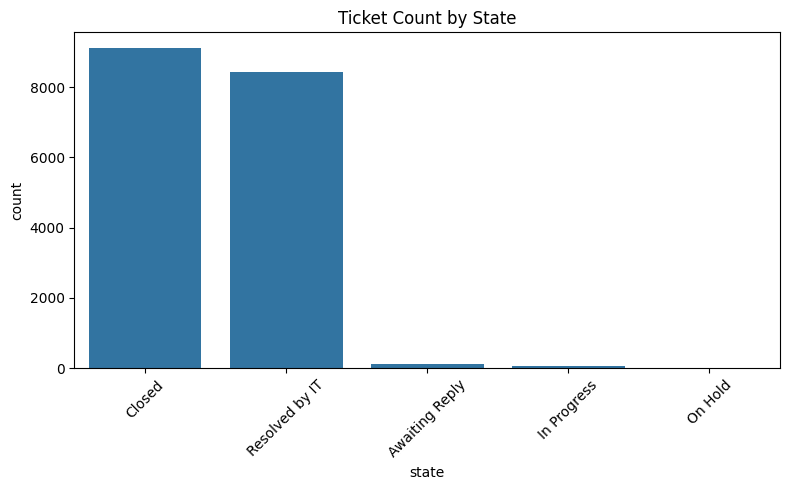

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.title("Ticket Count by State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

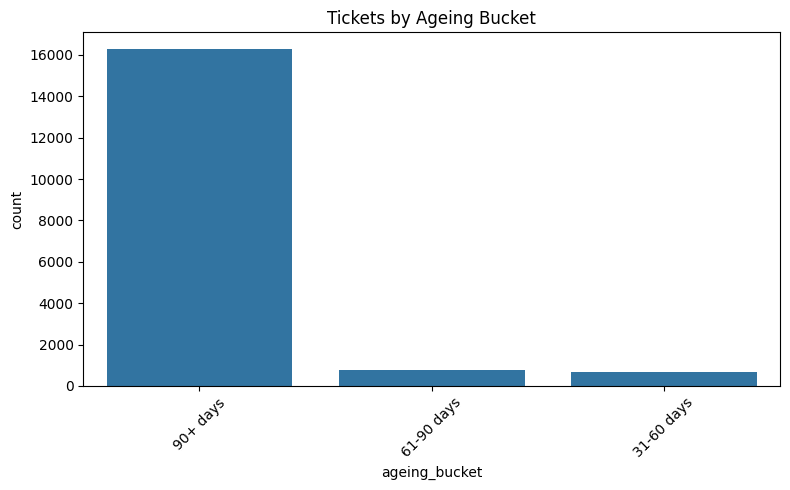

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ageing_bucket', order=df['ageing_bucket'].value_counts().index)
plt.title("Tickets by Ageing Bucket")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

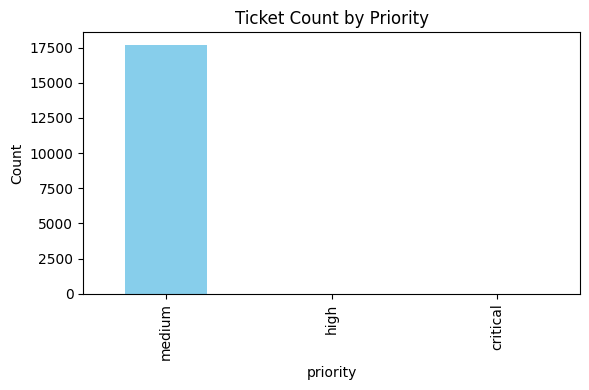

In [12]:
plt.figure(figsize=(6,4))
df['priority'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Ticket Count by Priority")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [13]:
top_users = df['user'].value_counts().head(10)
top_agents = df['assignedagent'].value_counts().head(10)

print("Top Users:\n", top_users)
print("\nTop Assigned Agents:\n", top_agents)

Top Users:
 user
Microsoft Outlook                                             6642
MicrosoftExchange329e71ec88ae4615bbc36ab6ce41109e@hp.co.in    1717
MicrosoftExchange329e71ec88ae4615bbc36ab6ce41109e@hppr.pr      792
Ankita Meshram                                                 394
Avinash Sawant                                                 305
Neeta Shinde                                                   296
Pradeep Deshmukh                                               290
Rohidas Vekhande                                               285
Pankaj Jadhav                                                  222
Smeetha DMello                                                 210
Name: count, dtype: int64

Top Assigned Agents:
 assignedagent
Ashok Wagh            11509
Ramamurthy S           1422
Khushal Bhoir           747
Disha Meisheri          686
Ashwini Jahagirdar      646
Ashutosh Tripathi       581
Dimple Solanki          507
Nilesh Khaire           502
SRINIVAS Poojari        49

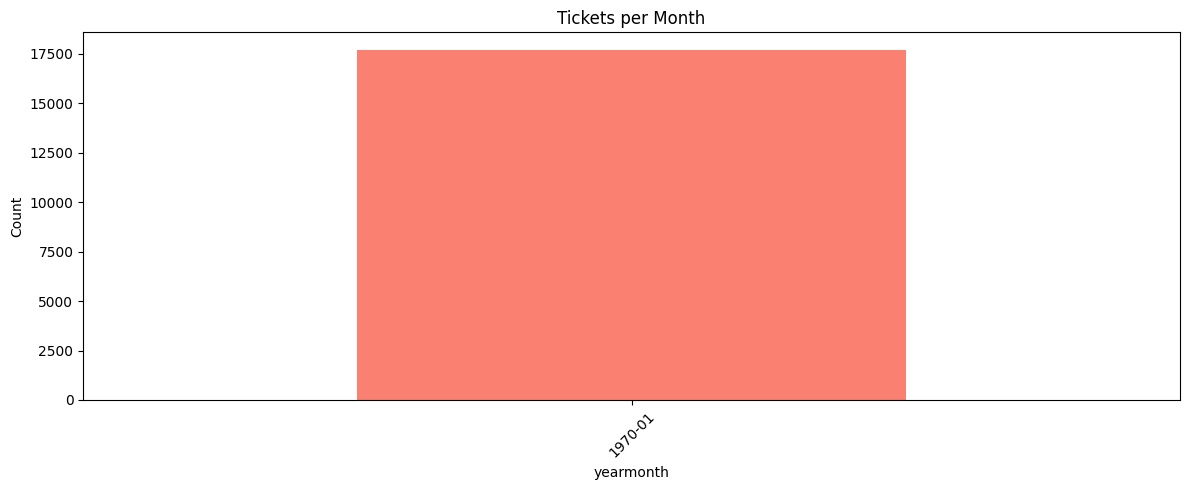

In [14]:
df['yearmonth'] = pd.to_datetime(df['yearmonth'], errors='coerce')
monthly_tickets = df.groupby(df['yearmonth'].dt.to_period("M")).size()

monthly_tickets.plot(kind='bar', figsize=(12,5), color='salmon')
plt.title("Tickets per Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
eda_dir = os.path.join(os.path.dirname(os.getcwd()), 'data', 'processed')
os.makedirs(eda_dir, exist_ok=True)
df.to_csv(os.path.join(eda_dir, 'tickets_cleaned_EDA.csv'), index=False)